## Introduction

Data for 375,000+ Kickstarter projects from 2009-2017, including project name, category, launch date, deadline, goal, amount pledged, number of backers, state, and country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.simplefilter('ignore')
import pandas_profiling as pp

## Assess

In [2]:
df= pd.read_csv("C:/Users/HP/Downloads/Kickstarter/kickstarter_projects.csv")

In [3]:
#Preview dataset
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [4]:
#check informations about columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [5]:
#statisitical summarization of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,374853.0,1.074656e+09,6.191377e+08,5971.0,538072804.0,1.075300e+09,1.610149e+09,2.147476e+09
Goal,374853.0,4.586378e+04,1.158778e+06,0.0,2000.0,5.500000e+03,1.600000e+04,1.663614e+08
Pledged,374853.0,9.121073e+03,9.132054e+04,0.0,31.0,6.250000e+02,4.051000e+03,2.033899e+07
Backers,374853.0,1.066904e+02,9.117185e+02,0.0,2.0,1.200000e+01,5.700000e+01,2.193820e+05


In [6]:
#statisitical summarization of non-numerical columns
df.describe(include='O')

,Name,Category,Subcategory,Country,Launched,Deadline,State
count,374853,374853,374853,374853,374853,374853,374853
unique,372061,15,159,22,374297,3164,5
top,New EP/Music Development,Film & Video,Product Design,United States,2015-02-19 18:05:04,2014-08-08,Failed
freq,13,62694,22310,292618,2,702,197611


In [7]:
#check for duplicated columns
df.duplicated().sum()

0

In [8]:
#Check for null values
df.isna().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

## Wrangling

In [9]:
df['Launched']= pd.to_datetime(df['Launched'], format='%Y/%m/%d %H:%M:%S')
df['Launched Year']= df['Launched'].dt.year
df['Deadline']= pd.to_datetime(df['Deadline'], format='%Y/%m/%d %H:%M:%S')

## Analyze

### Questions

- Which category has the highest success percentage? How many projects have been successful?

- What project with a goal over 1,000 USD, had the biggest Goal Completion  (Pledged / Goal)? How much money was pledged?

- Can you identify any trends in project success rates over the years?

- As an investor, what types of projects should you be looking at to guarantee future success?

### Average Pledged by state of projects

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Failed'),
  Text(1, 0, 'Successful'),
  Text(2, 0, 'Canceled'),
  Text(3, 0, 'Suspended'),
  Text(4, 0, 'Live')])

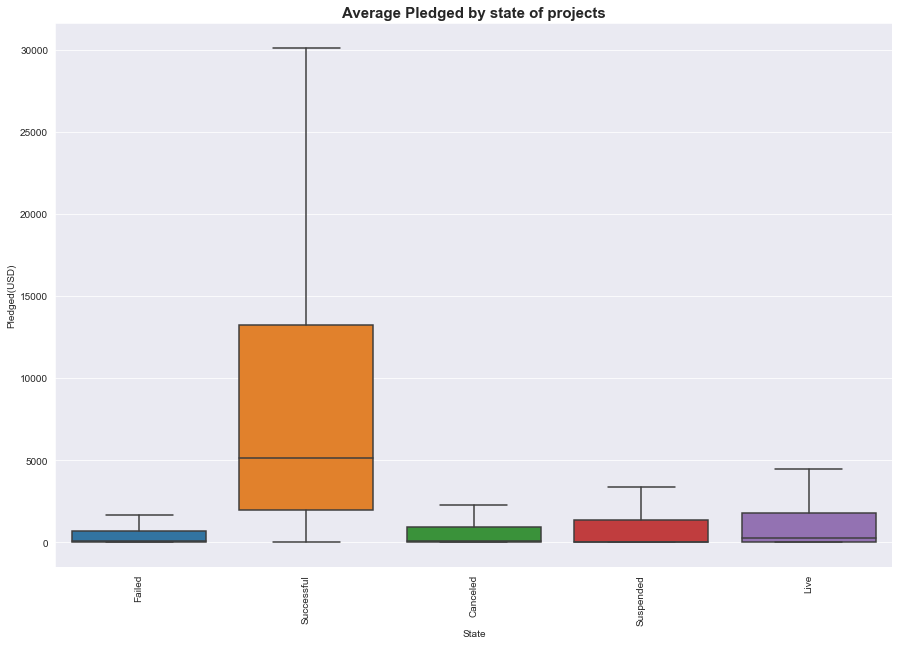

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='State',y='Pledged',sym='')
plt.title('Average Pledged by state of projects', fontsize=15, weight='bold')
plt.xlabel('State')
plt.ylabel('Pledged(USD)')
plt.xticks(rotation=90)

Successul projects have an average of 5000 USD pledged

### Number of successful projects

In [10]:
print(df['State'].value_counts().sort_values(ascending=False))
print ('The percentage:')
print (round((df['State'].value_counts().sort_values(ascending=False)/ df['State'].count())*100.0, 0))

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64
The percentage:
Failed        53.0
Successful    36.0
Canceled      10.0
Live           1.0
Suspended      0.0
Name: State, dtype: float64


In [11]:
def myplotcount(df, xvar,color=0,order=None,hue=None,hue_order=None,palette= None):
    #set fig size
    plt.figure(figsize=[10,7])
    #plotting
    sns.countplot(data=df,x=xvar, hue=hue,color=sns.color_palette()[color],palette=palette,order= order,edgecolor='black',hue_order=hue_order,linewidth=2);

Text(0, 0.5, 'Frequency')

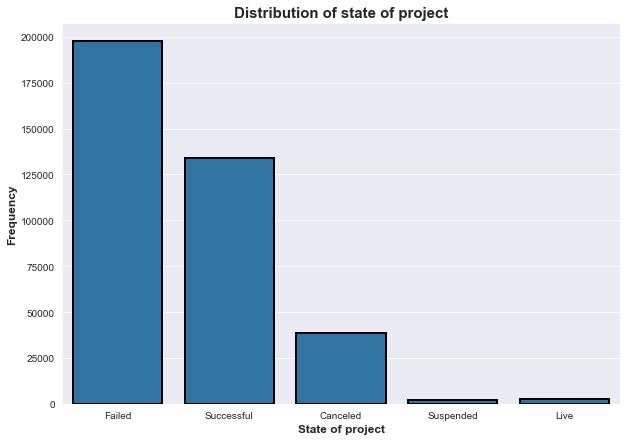

In [12]:
myplotcount(df,'State')
plt.title('Distribution of state of project', fontsize=15, weight='bold')
plt.xlabel('State of project', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')

According to analysis above, 53% of the projects failed while only 36% were successful

### Which category has the highest success percentage? 

In [13]:
# Try to create a new data frame that contains nly successful projects
df_success = df.query('State == "Successful"')
#Get the  percentage of succesful categories round off to the nearest decimal place
success= df_success['Category'].value_counts().sort_values(ascending=False)
perc_success= round(df_success['Category'].value_counts().sort_values(ascending=False)/ df_success['Category'].count()* 100.0,1)
perc_success

Music           18.0
Film & Video    17.6
Games            9.4
Publishing       9.2
Art              8.6
Design           7.9
Theater          4.9
Technology       4.8
Food             4.5
Comics           4.4
Fashion          4.2
Photography      2.5
Dance            1.7
Crafts           1.6
Journalism       0.8
Name: Category, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Art'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Journalism'),
  Text(3, 0, 'Publishing'),
  Text(4, 0, 'Photography'),
  Text(5, 0, 'Games'),
  Text(6, 0, 'Film & Video'),
  Text(7, 0, 'Theater'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'Comics'),
  Text(10, 0, 'Food'),
  Text(11, 0, 'Fashion'),
  Text(12, 0, 'Design'),
  Text(13, 0, 'Crafts'),
  Text(14, 0, 'Dance')])

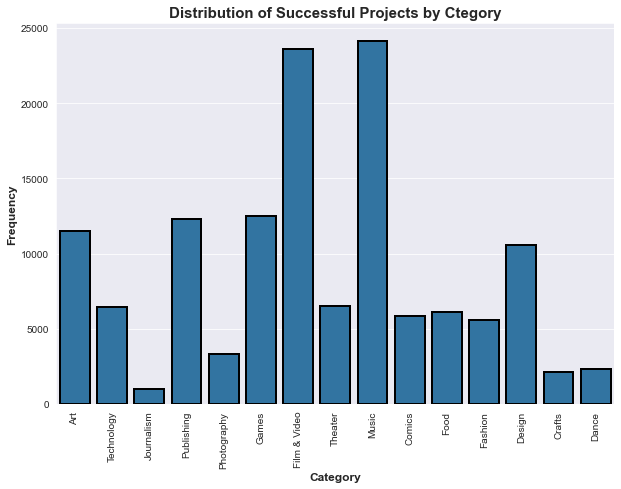

In [14]:
myplotcount(df_success,'Category')
plt.title('Distribution of Successful Projects by Ctegory', fontsize=15, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')
plt.xlabel('Category', fontsize=12, weight='bold')
plt.xticks(rotation=90)

Music and Film & Video categories have the highest percentage of succesful projects, while Journalism was the lowest

### What project with a goal over 1,000 USD, had the biggest Goal Completion (Pledged / Goal)? How much money was pledged?

In [15]:
# get the succesful project with over 1000usd goal
df_success_n_1000= df.query('State== "Successful" and Goal >1000 ')
df_success_n_1000['Completion%'] = round(df['Pledged']/df['Goal']*100)
df_success_n_1000['Completion%'] =df_success_n_1000['Completion%'].astype('int64')
df_success_n_1000.pivot_table(values=['Goal','Pledged','Completion%'], index='Name', aggfunc=sum).sort_values('Completion%',ascending=False)

,Completion%,Goal,Pledged
Name,,,
Exploding Kittens,87826,10000,8782572
The World's Best TRAVEL JACKET with 15 Features || BAUBAX,45960,20000,9192056
Fidget Cube: A Vinyl Desk Toy,43105,15000,6465690
Joking Hazard,32466,10000,3246589
Bears vs Babies - A Card Game,32157,10000,3215680
...,...,...,...
"Beneath the Skin - A Multi-dimensional, Engaging Experience",100,2000,2000
4P Foods - A Benefit Corporation,100,5000,5007
4Love&Wore The Original California Tee Shirt,100,5000,5001


In [16]:
df_success_n_1000.query('Name== "Exploding Kittens"')

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Launched Year,Completion%
194479,1955357092,Exploding Kittens,Games,Tabletop Games,United States,2015-01-20 19:00:19,2015-02-20,10000,8782572,219382,Successful,2015,87826


Exploding Kittens, under Games category has the highest pledge to goal ratio with over 8.7 million dollars pledged for just a 10 thousand dollars goal.

### Can you identify any trends in project success rates over the years?

In [17]:
trends_year=df_success.pivot_table(index='Launched Year',columns='Category',values='ID',aggfunc=np.count_nonzero)
trends_year

Category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
Launched Year,,,,,,,,,,,,,,,
2009,77,12,4,3,8,4,124,17,23,20,157,31,57,19,23
2010,382,110,19,108,69,43,1473,120,70,68,1295,190,222,65,359
2011,1189,268,46,299,302,186,3317,258,284,67,3763,331,758,140,963
2012,1694,548,126,368,760,435,3771,682,941,88,4944,407,1639,325,1164
2013,1684,753,213,388,1255,776,4029,947,1490,81,3757,443,1951,672,963
2014,1783,820,381,413,1718,978,3599,1385,1984,172,3127,543,2050,1142,1011
2015,1707,994,526,293,2046,1094,3004,1171,2263,248,2611,539,1973,1601,901
2016,1311,1097,401,262,2130,926,2391,791,2592,145,2340,469,1849,1307,664
2017,1683,1240,399,204,2261,1151,1904,714,2871,123,2111,352,1801,1162,486


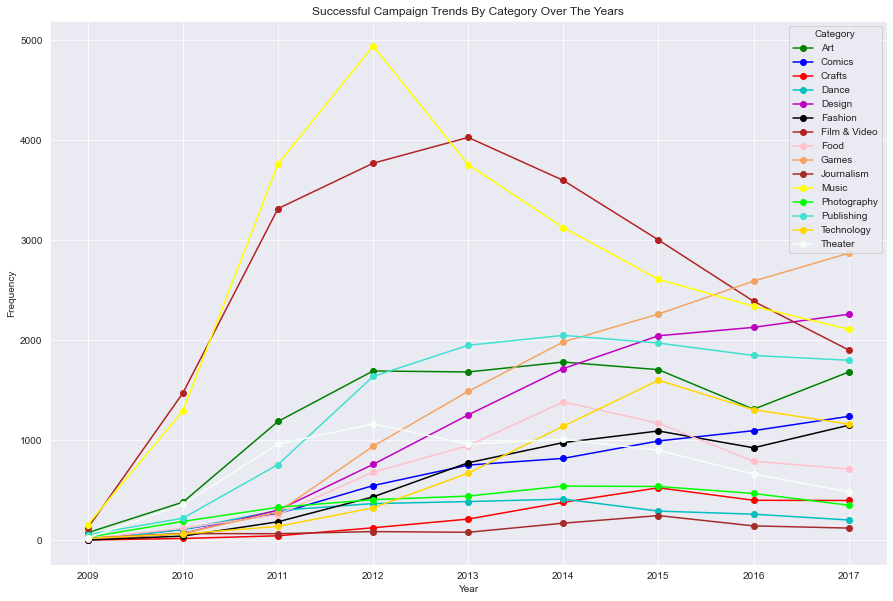

In [36]:
trends_year.plot(kind='line', marker='o', figsize=(15,10), ylabel='Frequency',xlabel='Year',color=['g','b','r','c','m','k','firebrick','pink','sandybrown','brown','yellow','lime','turquoise','gold','mintcream'],title='Successful Campaign Trends By Category Over The Years')
plt.legend(title='Category')

There's a general upward trends in projects success rate over the years, Although Music peaked in 2012 and since then been trending downwards

### As an investor, what types of projects should you be looking at to guarantee future success?
I'll invest in Games, for the follwing reasons;
- the highest pledged to goal ratio was under Games category, over 8.7 million dollars pledged for just a 10 thousand dollars goal.
- According to the line graph aboe, Games seems to have a steady upward trend unlike others
- Gaming is cool!

## EXtra

#### Average pledge by countries

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'New Zealand'),
  Text(5, 0, 'Netherlands '),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Denmark'),
  Text(8, 0, 'Norway'),
  Text(9, 0, 'Ireland'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'Italy'),
  Text(15, 0, 'Switzerland'),
  Text(16, 0, 'Austria'),
  Text(17, 0, 'Luxembourg'),
  Text(18, 0, 'Singapore'),
  Text(19, 0, 'Hong Kong'),
  Text(20, 0, 'Mexico'),
  Text(21, 0, 'Japan')])

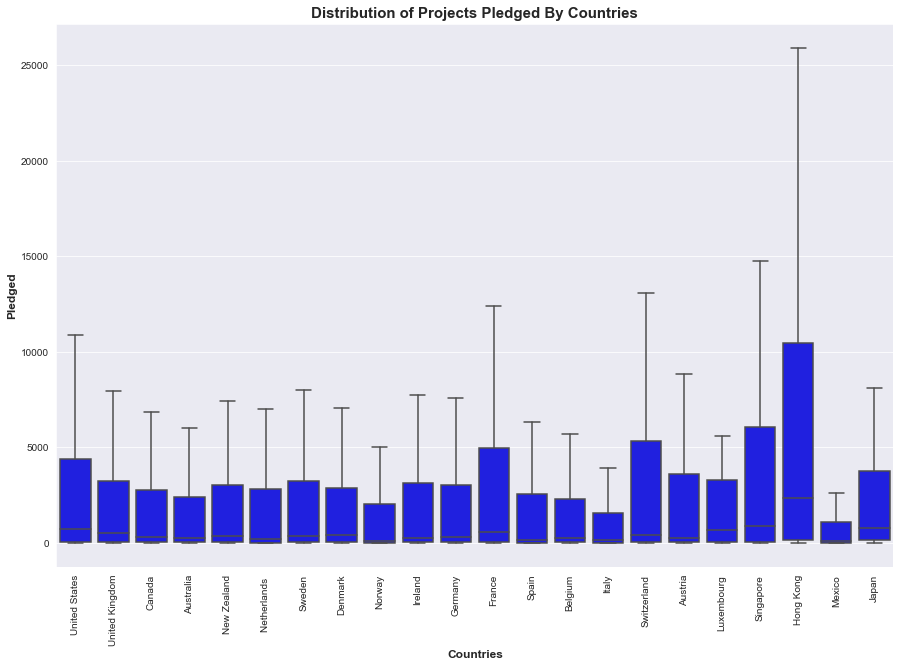

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Country',y='Pledged', data=df,sym='',color='blue')
plt.title('Distribution of Projects Pledged By Countries', fontsize=15, weight='bold')
plt.ylabel('Pledged', fontsize=12, weight='bold')
plt.xlabel('Countries', fontsize=12, weight='bold')
plt.xticks(rotation=90)

Hong Kong has the highest average amount pledged by any country